In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.6.0'

In [3]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
from __future__ import division, print_function, unicode_literals
import tensorflow as tf
from time import time
from keras.utils import np_utils#one hot
import os
from skimage import data
from skimage import transform
import skimage
import numpy as np

# Download the dataset


def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                  if os.path.isdir(os.path.join(data_directory,d))]
    labels=[]
    images=[]
    for d in directories:
        label_directory = os.path.join(data_directory,d)
        file_names = [os.path.join(label_directory,f)
                     for f in os.listdir(label_directory)
                     if f.endswith('.jpg')]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels






Using TensorFlow backend.


In [4]:
ROOT_PATH = '/home/tang/targa/BigSize1/'
train_data_directory = os.path.join(ROOT_PATH, "train")
validation_data_directory = os.path.join(ROOT_PATH, "val")
test_data_directory = os.path.join(ROOT_PATH, "test")
train_images,train_labels = load_data(train_data_directory)
test_images,test_labels = load_data(test_data_directory)
validation_images,validation_labels = load_data(validation_data_directory)

In [5]:
#encoding trY teY
from numpy import array
#from numpy import argmax
#from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example

#train_labels = np_utils.to_categorical(train_labels,num_classes = None)
#test_labels = np_utils.to_categorical(test_labels,num_classes = None)
trL,teL,valL=array(train_labels),array(test_labels),array(validation_labels)
label_encoder = LabelEncoder()

In [6]:
integer_encoded_trL = label_encoder.fit_transform(trL)
integer_encoded_teL = label_encoder.fit_transform(teL)
integer_encoded_valL = label_encoder.fit_transform(valL)

In [7]:
trainLabels = np_utils.to_categorical(integer_encoded_trL,num_classes = 32)
testLabels = np_utils.to_categorical(integer_encoded_teL,num_classes = 32)
validationLabels = np_utils.to_categorical(integer_encoded_valL,num_classes = 32)

In [8]:
num_sample = 1165
for n in range(33):
    nnnn = num_sample*n
    print(n)
    print(integer_encoded_teL[nnnn])
    print(teL[nnnn])
    print('--------------------')

0
18
J
--------------------
1
18
J
--------------------
2
14
E
--------------------
3
7
7
--------------------
4
10
A
--------------------
5
25
S
--------------------
6
11
B
--------------------
7
20
L
--------------------
8
26
T
--------------------
9
31
Z
--------------------
10
23
P
--------------------
11
19
K
--------------------
12
12
C
--------------------
13
15
F
--------------------
14
22
N
--------------------
15
28
W
--------------------
16
9
9
--------------------
17
30
Y
--------------------
18
1
1
--------------------
19
3
3
--------------------
20
4
4
--------------------
21
24
R
--------------------
22
5
5
--------------------
23
16
G
--------------------
24
27
V
--------------------
25
6
6
--------------------
26
0
0
--------------------
27
13
D
--------------------
28
21
M
--------------------
29
29
X
--------------------
30
8
8
--------------------
31
2
2
--------------------
32
17
H
--------------------


In [9]:
teL[1000]

'J'

In [10]:
testLabels[2000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
########convert rgb images into black and white
#convert images into size of vector
from skimage.color import rgb2gray

trainImages = rgb2gray(np.array(train_images))
testImages = rgb2gray(np.array(test_images))
valImages = rgb2gray(np.array(validation_images))
train_flat_images = np.reshape(trainImages,(len(trainImages),160*90))
test_flat_images = np.reshape(testImages,(len(testImages),160*90))
val_flat_images = np.reshape(valImages,(len(valImages),160*90))

In [73]:
valImages.shape

(37312, 160, 90)

In [74]:
train_flat_images[0].shape

(14400,)

In [75]:
print('train images shape:\t\t{}'.format(train_flat_images.shape))

print('test images shape:\t\t{}'.format(test_flat_images.shape))

print('val images shape:\t\t{}'.format(val_flat_images.shape))

train images shape:		(37312, 14400)
test images shape:		(37312, 14400)
val images shape:		(37312, 14400)


In [76]:
integer_encoded_trL[0]

18

In [77]:
validationLabels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [78]:
print('Size of:')
print('- Training-set:\t\t{}'.format(len(trainLabels)))
print('- Test-set:\t\t{}'.format(len(testLabels)))
print('- Validation-set:\t{}'.format(len(validation_labels)))

Size of:
- Training-set:		37312
- Test-set:		37312
- Validation-set:	37312


In [79]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [80]:
def create_sprite_image(images):
    """Returns a sprite image consisting of images passed as argument. Images should be count x width x height"""
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    
    
    spriteimage = np.ones((img_h * n_plots ,img_w * n_plots ))
    
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                spriteimage[i * img_h:(i + 1) * img_h,
                  j * img_w:(j + 1) * img_w] = this_img
    
    return spriteimage

def vector_to_matrix_mnist(mnist_digits):
    """Reshapes normal mnist digit (batch,28*28) to matrix (batch,28,28)"""
    return np.reshape(mnist_digits,(-1,160,90))

def invert_grayscale(mnist_digits):
    """ Makes black white, and white black """
    return 1-mnist_digits

In [81]:
batch_size = 100

n_batch = len(trainLabels)//batch_size
lr = tf.Variable(0.001,dtype = tf.float32)
LOG_DIR = '/home/DL/tensorflow/targaLogs/'
NAME_TO_VISUALISE_VARIABLE = "targaembedding"
TO_EMBED_COUNT = 100

In [82]:
path_for_targa_sprites =  os.path.join(LOG_DIR,'targa_32k_sprite.png')
path_for_targa_metadata =  os.path.join(LOG_DIR,'metadataTarga.tsv')

In [83]:
batch_xs,batch_ys = next_batch(TO_EMBED_COUNT,train_flat_images,trainLabels)

In [84]:
embedding_var = tf.Variable(batch_xs, name=NAME_TO_VISUALISE_VARIABLE)
summary_writer = tf.summary.FileWriter(LOG_DIR)

In [85]:
batch_xs.shape[0]

100

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

from tensorflow.contrib.tensorboard.plugins import projector

In [87]:
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

# Specify where you find the metadata
embedding.metadata_path = path_for_targa_metadata #'metadata.tsv'

# Specify where you find the sprite (we will create this later)
embedding.sprite.image_path = path_for_targa_sprites #'mnistdigits.png'
embedding.sprite.single_image_dim.extend([160,90])

# Say that you want to visualise the embeddings
projector.visualize_embeddings(summary_writer, config)

In [88]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
saver.save(sess, os.path.join(LOG_DIR, "model.ckpt"), 1)

'/home/DL/tensorflow/targaLogs/model.ckpt-1'

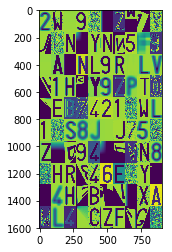

In [89]:
to_visualise = batch_xs
to_visualise = vector_to_matrix_mnist(to_visualise)
#to_visualise = invert_grayscale(to_visualise)

sprite_image = create_sprite_image(to_visualise)

#plt.imsave(path_for_targa_sprites,sprite_image,cmap='gray')
#plt.imshow(sprite_image,cmap='gray')
plt.imsave(path_for_targa_sprites,sprite_image)
plt.imshow(sprite_image)

In [90]:
#把编码数字转化成为字母
with tf.Session() as sess:
    ppp=sess.run(tf.argmax(batch_ys[:],1))
    
    transfercode=[trL[num_sample * p] for p in ppp]
        

In [91]:

    
with open(path_for_targa_metadata,'w') as f:
    f.write("Index\tLabel\n")
    for index,label in enumerate(transfercode):
        #f.write("%s\t%s\n" % (index,label))
        f.write("%s\n" % (label))

        

In [92]:
ppp=tf.argmax(batch_ys[:],1)

In [93]:
with tf.Session() as sess:
    print(sess.run(ppp))
    

[ 2 28  7  9 24 21 31 28  1 27 18 16 22  2 30 22  3  5 15  9 26 10  8 22
 20  9 24  6 20 27 17  1 17 10 30  9 31 23 26  0 20 14 11  7  4  2  1  1
 28 20  1 17 25  8 18 17 18  7  5  5 31  8 24  9  4 10 26 27 22  8  2 17
 24  8  4  6 14  7 30 15  1  4 17 28 11  2  4 21 29 10 28 20  4 12 12 31
 15 27 16 17]


In [ ]:
##########################################################################################################


In [16]:
#命名空间
with tf.name_scope('input'):
    #定义两个placeholder 
    #把批次的图片传进去，开始是100张一次的传送，直到最后
    x = tf.placeholder(tf.float32,[None,14400],name='x-input')
    y = tf.placeholder(tf.float32,[None,32],name='y-input')
    #定义一个dropout的值
    keep_prob = tf.placeholder(tf.float32,name = 'non-dropout-rate')
with tf.name_scope('layer'):
    with tf.name_scope('W1'):
        #第一层
        W1 = tf.Variable(tf.truncated_normal([14400,1000],stddev=0.1),name='W1')#改成截断正太分布
    with tf.name_scope('b1'):
        
        b1 = tf.Variable(tf.zeros([1000])+0.1,name = 'b1')
    with tf.name_scope('out1'):
        
        output1 = tf.matmul(x,W1) + b1
    with tf.name_scope('L1'):
        L1 = tf.nn.tanh(output1)
    with tf.name_scope('L1-drop'):
        #L1为第一层的输出，keep_prob为1的话就是不丢失，如果为0的话就是全丢，如果为0.5的话就是丢失50%的神经元
        L1_drop = tf.nn.dropout(L1,keep_prob)

    with tf.name_scope('W2'):
        #第二层
        W2 = tf.Variable(tf.truncated_normal([1000,2000],stddev=0.1),name='W2')
    with tf.name_scope('b2'):
        b2 = tf.Variable(tf.zeros([2000])+0.2,name='b2')
    with tf.name_scope('output2'):
        output2 = tf.matmul(L1_drop,W2)+b2
    with tf.name_scope('L2'):
        
        L2 = tf.nn.tanh(output2)
    with tf.name_scope('L2_drop'):
        #L1为第一层的输出，keep_prob为1的话就是不丢失，如果为0的话就是全丢，如果为0.5的话就是丢失50%的神经元
        L2_drop = tf.nn.dropout(L2,keep_prob)

    with tf.name_scope('W3'):
        #第三层
        W3 = tf.Variable(tf.truncated_normal([2000,1000],stddev=0.1),name='W3')
    with tf.name_scope('b3'):
        b3 = tf.Variable(tf.zeros([1000])+0.1,name='b3')
    with tf.name_scope('output3'):   
        output3 = tf.matmul(L2_drop,W3)+b3
    with tf.name_scope('L3'):
        L3 = tf.nn.tanh(output3)
    with tf.name_scope('L3-drop'):
        #L1为第一层的输出，keep_prob为1的话就是不丢失，如果为0的话就是全丢，如果为0.5的话就是丢失50%的神经元
        L3_drop = tf.nn.dropout(L3,keep_prob)
    with tf.name_scope('W4'):
        # 第四层
        W4 = tf.Variable(tf.truncated_normal([1000,32],stddev=0.1))
    with tf.name_scope('b4'):        
        b4 = tf.Variable(tf.zeros([32])+0.1)
    with tf.name_scope('output4'):
        output4 = tf.matmul(L3_drop,W4)+ b4
    with tf.name_scope('softmax'):
        #预测分类
        prediction = tf.nn.softmax(output4)
with tf.name_scope('loss'):
    #定义一个损失函数
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits = prediction))#联合交叉熵
    #loss = tf.reduce_mean(tf.square(y-prediction))
with tf.name_scope('train'):
    #定义一个方法来收敛神经网络，使用梯度下降法,学习率=0.1
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    #train_step = tf.train.AdamOptimizer(0.1).minimize(loss)
#初始化
init = tf.global_variables_initializer()
with tf.name_scope('accuracy'):
    with tf.name_scope('correct-prediction'):
        #定义一个求准确率的方法
        #如果有两个相同的就会返回TRUE，不相同就返回false，然后就依次存入correct_prediction
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))#argmax返回一维张量中的最大值
    with tf.name_scope('accuracy'):    
        #求准确率
        #首先把bool值转化成32位的浮点数，然后求平均值
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [17]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    #路径和文件名
    write = tf.summary.FileWriter('logs/fourLayerFullyConnectedTargaDropout',sess.graph)
    for epoch in range(1000):#把所有的图片训练20次
        #一批一批的迭代图片，一次迭代100张，一共运行n_batch次
        for batch in range(n_batch):
            #每次传入一百张图片
            batch_xs,batch_ys = next_batch(batch_size,train_flat_images,trainLabels)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.8})
        
        acc = sess.run(accuracy,feed_dict={x:test_flat_images,y:testLabels,keep_prob:1.0})
        train_acc = sess.run(accuracy,feed_dict={x:train_flat_images,y:trainLabels,keep_prob:1.0})
        print('epoch=' + str(epoch) + 'test accuracy=' + str(acc)+'train accuracy='+ str(train_acc))

epoch=0test accuracy=0.3722663train accuracy=0.37583083
epoch=1test accuracy=0.4273424train accuracy=0.43114814
epoch=2test accuracy=0.45524228train accuracy=0.4611117
epoch=3test accuracy=0.4922545train accuracy=0.49828473
epoch=4test accuracy=0.49839193train accuracy=0.50710225
epoch=5test accuracy=0.50134003train accuracy=0.5103988


In [ ]:
#change learning rate?